# COVID 19 PANDEMIC ANALYSIS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as snb

In [3]:
covid= pd.read_csv('covid_19_india.csv')
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
covid.shape

(18110, 9)

In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [6]:
covid.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [7]:
covid.dropna()
covid.drop_duplicates()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [8]:
covid.rename(columns={'ConfirmedIndianNational':'confirm_india',"ConfirmedForeignNational":'confirm_foreign',
                      'State/UnionTerritory':'state'},inplace=True)
covid.head()

,Sno,Date,Time,state,confirm_india,confirm_foreign,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [9]:
# DATATYPE CONVERSION
covid['Date']=pd.to_datetime(covid['Date'],format="%Y-%m-%d")

# INDIA
covid['confirm_india']=covid['confirm_india'].str.replace('-','0')
covid['confirm_india']=covid['confirm_india'].astype(str).astype(int)

#FROM ForienCountry
covid['confirm_foreign']=covid['confirm_foreign'].str.replace('-','0')
covid['confirm_foreign']=covid['confirm_foreign'].astype(str).astype(int)

---------------------------------

> # TO FIND PEOPLE AFFECTED BY COVID-19 IN MILLION BY STATES

In [10]:
confirm_case = covid.groupby('state')['Confirmed'].sum().rename('confirm-count in M').sort_values(ascending=False)
confirm_case = round(confirm_case.rename_axis('State')/1000000 , 2).reset_index().head(15)
confirm_case

,State,confirm-count in M
0,Maharashtra,1121.49
1,Karnataka,485.97
2,Kerala,458.91
3,Tamil Nadu,431.93
4,Andhra Pradesh,392.43
5,Uttar Pradesh,312.63
6,Delhi,287.23
7,West Bengal,263.11
8,Chhattisgarh,163.78
9,Rajasthan,162.37


___________________________________________________

> # TO PLOT CONFIRM CASES PER STATE

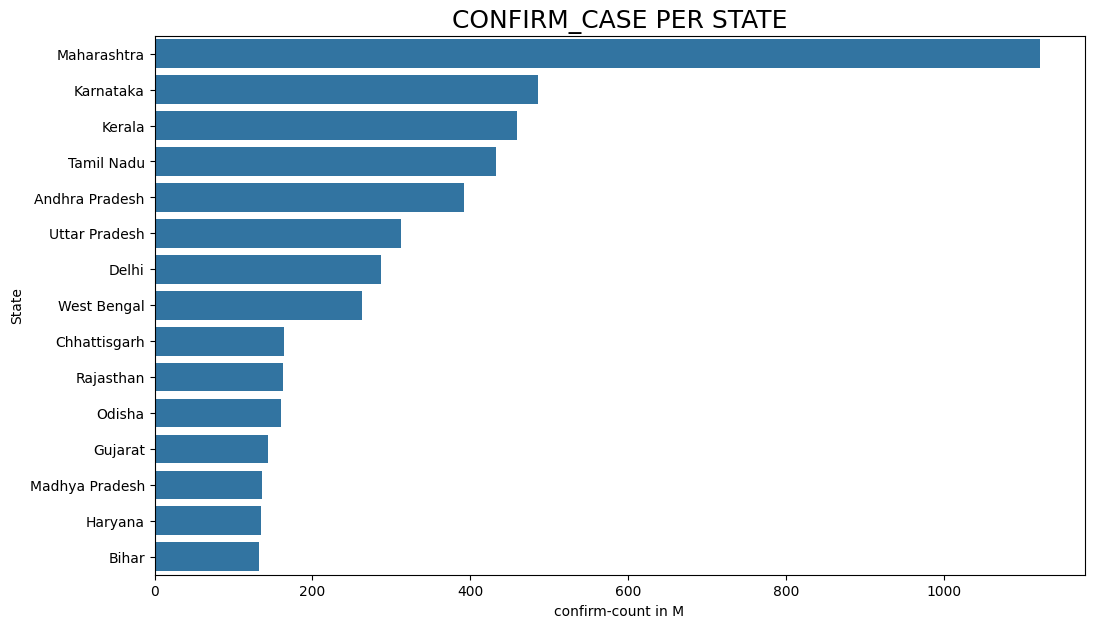

In [11]:
plt.figure(figsize=(12,7))
snb.barplot(y='State',x='confirm-count in M',data=confirm_case,orient='h')  #SEABORN AS SNB
plt.title("CONFIRM_CASE PER STATE",fontsize=18)
plt.show()

---------------------

> # Deaths per state

In [12]:

death_case = covid.groupby('state')['Deaths'].sum().rename('death-count in M').sort_values(ascending=False)
death_case = round(death_case.rename_axis('state')/1000000,2).reset_index().head(15)
death_case

,state,death-count in M
0,Maharashtra,23.74
1,Karnataka,6.05
2,Tamil Nadu,5.92
3,Delhi,4.94
4,Uttar Pradesh,4.14
5,West Bengal,3.85
6,Andhra Pradesh,2.94
7,Punjab,2.79
8,Gujarat,2.22
9,Chhattisgarh,2.06


---------------

> # TO PLOT MORTALITY COUNT PER STATE IN MILLION

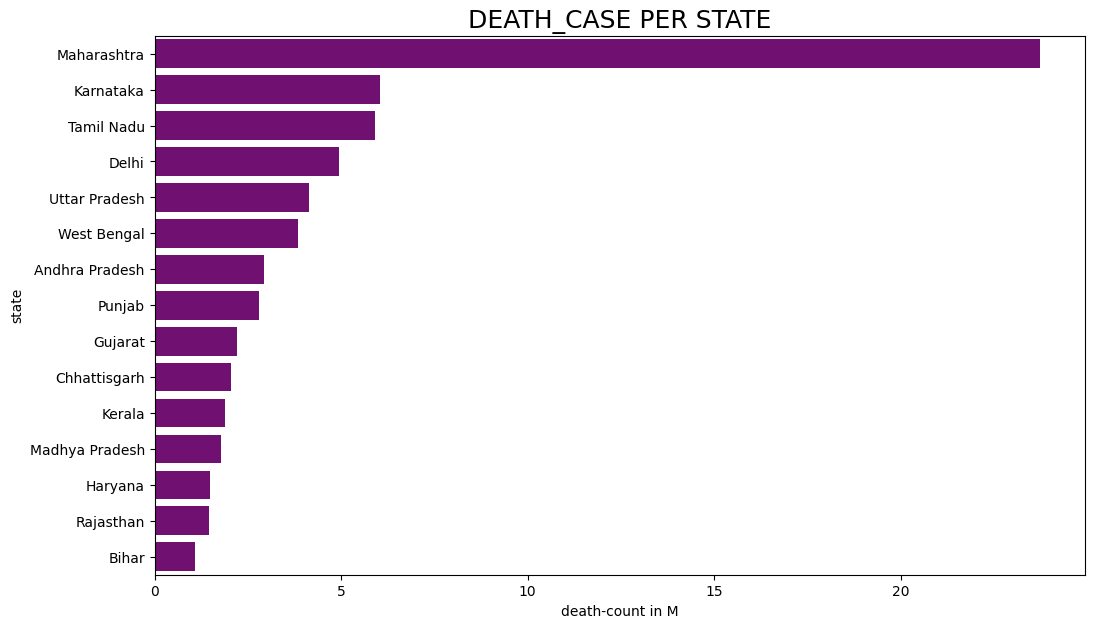

In [13]:
plt.figure(figsize=(12,7))
snb.barplot(y='state',x='death-count in M',data=death_case,orient='h',color='purple')
plt.title("DEATH_CASE PER STATE",fontsize=18)
plt.show()

---------------------

> # TO FIND THE COUNT OF CASES CONFIRMED FROM FOREIGN TRAVELLING

In [14]:
outside = covid.groupby('state')['confirm_foreign'].sum().sort_values(ascending=False).head(10)
outside = outside.rename_axis('state').reset_index()
outside

,state,confirm_foreign
0,Haryana,266
1,Rajasthan,135
2,Telengana,97
3,Kerala,69
4,Maharashtra,36
5,Tamil Nadu,26
6,Uttar Pradesh,17
7,Delhi,11
8,Uttarakhand,5
9,Gujarat,5


-------------------------------

> # TO PLOT STATE WISE CASES DUE TO FOREIGN TRAVELING

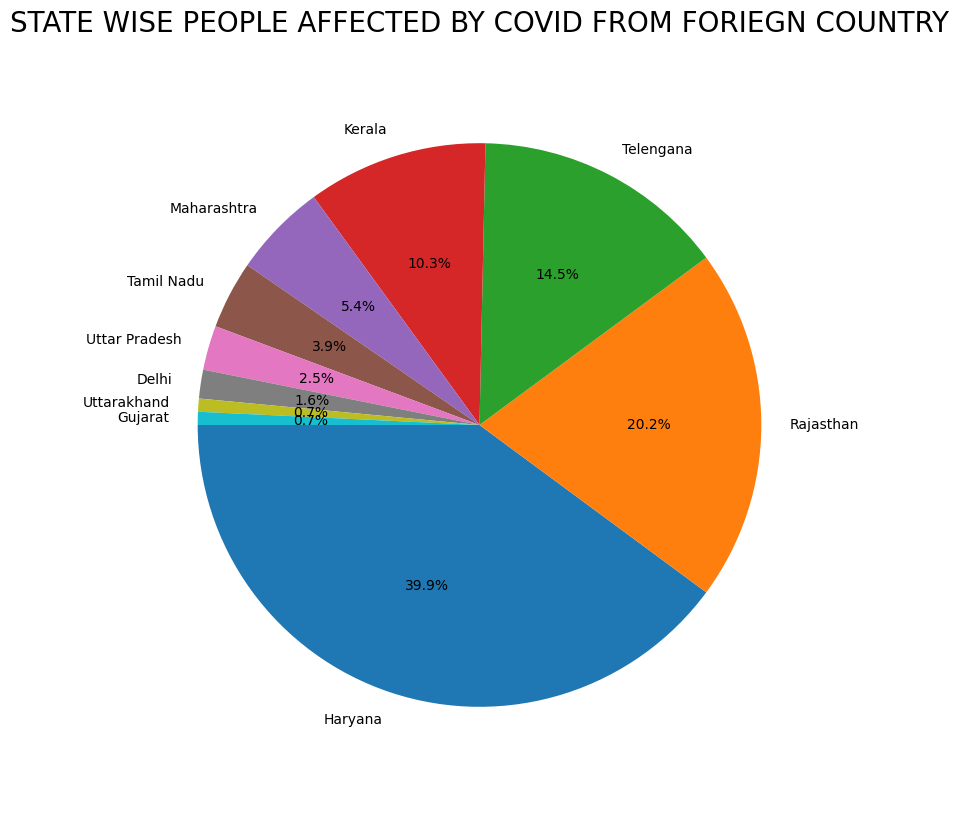

In [15]:
plt.figure(figsize=(8,10))
plt.pie(outside['confirm_foreign'], labels=outside['state'], autopct='%1.1f%%', startangle=180)
plt.title('STATE WISE PEOPLE AFFECTED BY COVID FROM FORIEGN COUNTRY',fontsize=20)
plt.axis('equal')
plt.show()

----------------------

> # TO FIND CURED CASES PER STATE

In [16]:

cured_case = covid.groupby('state')['Cured'].sum().rename('cured-count in M').sort_values(ascending=False)
cured_case = round(cured_case.rename_axis('state')/1000000, 2).reset_index().head(15)
cured_case

,state,cured-count in M
0,Maharashtra,1018.77
1,Karnataka,441.84
2,Kerala,420.17
3,Tamil Nadu,404.10
4,Andhra Pradesh,370.43
5,Uttar Pradesh,291.48
6,Delhi,273.42
7,West Bengal,247.52
8,Chhattisgarh,151.61
9,Odisha,150.92


------------------

> # TO PLOT CURED CASES PER STATE

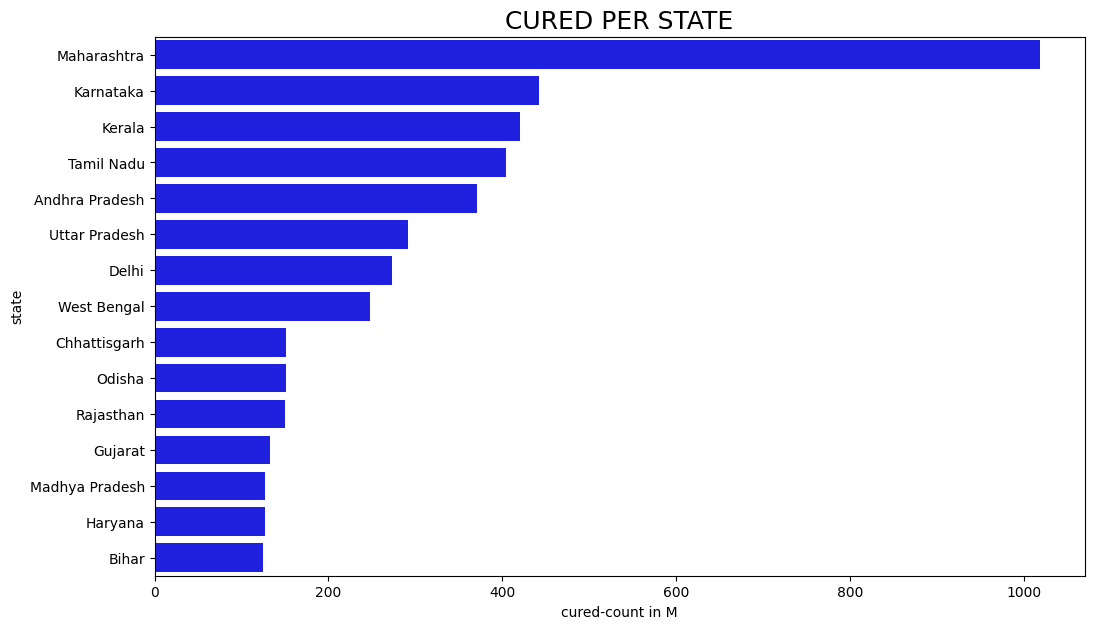

In [17]:
plt.figure(figsize=(12,7))
snb.barplot(y='state',x='cured-count in M',data=cured_case,orient='h',color='blue')
plt.title("CURED PER STATE",fontsize=18)
plt.show()

---------------------

> # TO FIND THE CONFIRMED CASES IN A STATE OVER TIME

In [18]:
KA=covid.query("state=='Karnataka'")
KA['month-year'] = KA['Date'].dt.strftime('%b-%y')
KA = KA.groupby('month-year')['Confirmed'].sum()
KA= KA.reset_index()
KA


C:\Users\hp\AppData\Local\Temp\ipykernel_7616\2038987840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KA['month-year'] = KA['Date'].dt.strftime('%b-%y')


,month-year,Confirmed
0,Apr-20,9382
1,Apr-21,34558639
2,Aug-20,6889574
3,Aug-21,32047133
4,Dec-20,27994899
5,Feb-21,26460582
6,Jan-21,28833752
7,Jul-20,1705708
8,Jul-21,86288853
9,Jun-20,225375


------------------------

> # TO PLOT THE CONFIRMED CASES IN A STATE BY (Year-Month)

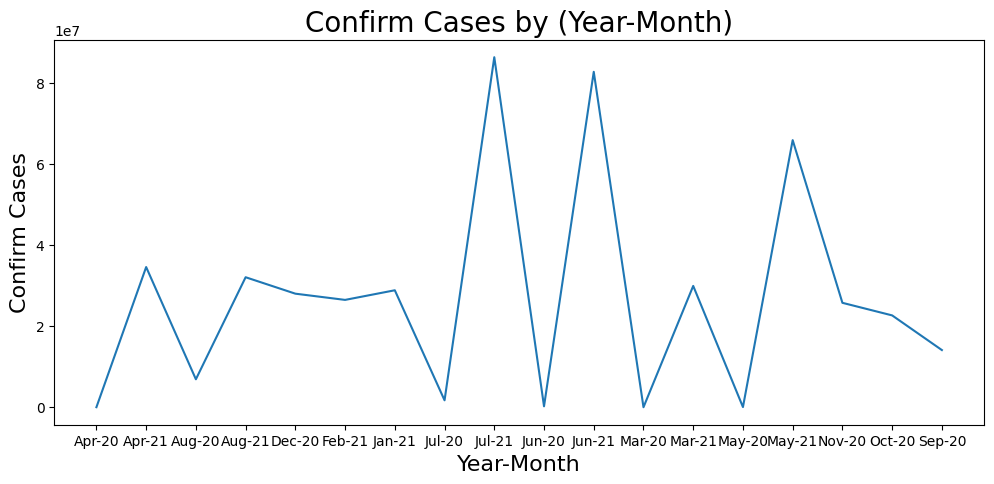

In [19]:
plt.figure(figsize=(12,5))
plt.plot(KA['month-year'], KA['Confirmed'])
plt.title('Confirm Cases by (Year-Month)',fontsize=20)
plt.xlabel('Year-Month',fontsize=16)
plt.ylabel('Confirm Cases',fontsize=16)
plt.show()

---------------------------------------------------

> # TO CALCULATE THE PERCENTAGE OF RECOVERY 

In [20]:
deaths = covid.groupby('state')['Deaths'].sum().sort_values(ascending=False)
cured = covid.groupby('state')['Cured'].sum().sort_values(ascending=False)
confirm = covid.groupby('state')['Confirmed'].sum().sort_values(ascending=False)
stats =  pd.concat([confirm,deaths,cured],axis=1).fillna(0)
stats['percentage of recover'] = round(stats['Cured']/stats['Confirmed']*100,2)
stats = stats.rename_axis('state').reset_index().head(15)
stats

,state,Confirmed,Deaths,Cured,percentage of recover
0,Maharashtra,1121491467,23737432,1018765039,90.84
1,Karnataka,485970693,6053762,441844360,90.92
2,Kerala,458906023,1888177,420174235,91.56
3,Tamil Nadu,431928644,5916658,404095807,93.56
4,Andhra Pradesh,392432753,2939367,370426530,94.39
5,Uttar Pradesh,312625843,4143450,291479351,93.24
6,Delhi,287227765,4943294,273419887,95.19
7,West Bengal,263107876,3846989,247515102,94.07
8,Chhattisgarh,163776262,2063920,151609364,92.57
9,Rajasthan,162369656,1473089,150356820,92.60


-----------------------

> # TO PLOT PERCENTAGE OF RECOVERY BY STATES

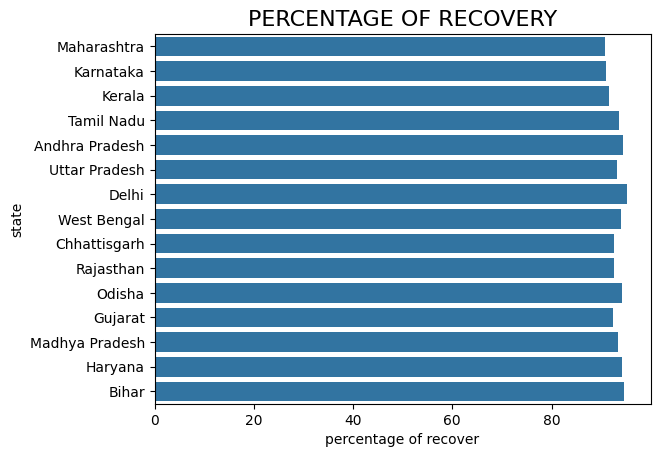

In [21]:
snb.barplot(x='percentage of recover',y='state',data=stats,orient='h')
plt.title('PERCENTAGE OF RECOVERY',fontsize=16)
plt.show()